In [49]:
import pandas as pd 
import numpy as np 
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"
import hangul_font
import warnings
warnings.filterwarnings(action='ignore')

import seaborn as sns

from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

In [50]:
data=pd.read_excel("total_seo.xlsx")
data

,Unnamed: 0,labels,행정동,시군구,응급실_60,주거면적_60미만,2019노인자살,2020노인학대건수,경로당,65세이상장애인수,수급권자수,65세이상인구수,독거노인,복지계열종사자수
0,0,1,중화2동,중랑구,5.948871,2.514954,4.539474,5.573077,3.926154,0.401372,0.394904,0.595316,0.643237,0.000000
1,1,1,신내1동,중랑구,5.948871,2.514954,4.539474,5.573077,3.926154,0.563237,0.617834,0.800918,0.483449,0.048780
2,2,1,면목본동,중랑구,5.948871,2.514954,4.539474,5.573077,3.926154,0.463374,0.456476,0.717614,0.705353,0.000000
3,3,1,망우본동,중랑구,5.948871,2.514954,4.539474,5.573077,3.926154,0.486968,0.456476,0.720150,0.688598,0.000000
4,4,1,종암동,성북구,5.694214,3.106311,6.900000,2.521154,2.301538,0.474897,0.354565,0.792346,0.650184,0.300813
5,5,1,석관동,성북구,5.694214,3.106311,6.900000,2.521154,2.301538,0.517695,0.352442,0.841845,0.690233,0.032520
6,6,1,번2동,강북구,4.652058,2.448019,3.268421,3.715385,4.840000,0.396708,0.666667,0.472413,0.466694,0.000000
7,7,1,번3동,강북구,4.652058,2.448019,3.268421,3.715385,4.840000,0.620576,1.000000,0.554871,0.542297,0.000000
8,8,1,삼양동,강북구,4.652058,2.448019,3.268421,3.715385,4.840000,0.377503,0.424628,0.579983,0.583163,0.000000
9,9,1,송중동,강북구,4.652058,2.448019,3.268421,3.715385,4.840000,0.415912,0.473461,0.707956,0.593380,0.000000


In [51]:
data["시군구"].value_counts()

노원구    7
강북구    6
은평구    6
강서구    6
관악구    5
강동구    5
중랑구    4
도봉구    3
성북구    2
강남구    1
Name: 시군구, dtype: int64

In [52]:
data.columns

Index(['Unnamed: 0', 'labels', '행정동', '시군구', '응급실_60', '주거면적_60미만', '2019노인자살',
       '2020노인학대건수', '경로당', '65세이상장애인수', '수급권자수', '65세이상인구수', '독거노인',
       '복지계열종사자수'],
      dtype='object')

In [60]:
from sklearn.preprocessing import StandardScaler
std_df = StandardScaler().fit_transform(data[['응급실_60', '주거면적_60미만', '2019노인자살',
       '2020노인학대건수']]) 
std_df = pd.DataFrame(std_df, index=data.index, columns=data[['응급실_60', '주거면적_60미만', '2019노인자살',
       '2020노인학대건수']].columns)
std_df.head()

,응급실_60,주거면적_60미만,2019노인자살,2020노인학대건수
0,0.164682,-0.891258,-0.046234,0.699671
1,0.164682,-0.891258,-0.046234,0.699671
2,0.164682,-0.891258,-0.046234,0.699671
3,0.164682,-0.891258,-0.046234,0.699671
4,0.074057,-0.563759,1.885670,-1.521676


In [61]:
from sklearn.decomposition import PCA

nc = 3

pca = PCA(n_components=nc)
pca_array = pca.fit_transform(std_df)
pca_df = pd.DataFrame(pca_array, index=std_df.index,
                      columns=[f"pca{num+1}" for num in range(nc)])
pca_df

sum(pca.explained_variance_ratio_)

,pca1,pca2,pca3
0,-0.614601,-0.107337,0.866556
1,-0.614601,-0.107337,0.866556
2,-0.614601,-0.107337,0.866556
3,-0.614601,-0.107337,0.866556
4,1.438385,-0.829341,-0.651077
5,1.438385,-0.829341,-0.651077
6,-1.140377,-1.009077,-0.485637
7,-1.140377,-1.009077,-0.485637
8,-1.140377,-1.009077,-0.485637
9,-1.140377,-1.009077,-0.485637


0.944195711069531

,설명가능한 분산 비율(고윳값),기여율,누적기여율
pca1,1.849866,0.452189,0.452189
pca2,1.554675,0.380032,0.832221
pca3,0.458078,0.111975,0.944196


<AxesSubplot:>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Scree plot')

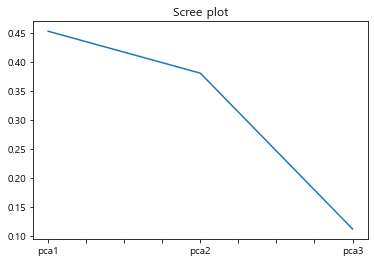

In [62]:
result = pd.DataFrame({'설명가능한 분산 비율(고윳값)':pca.explained_variance_,
             '기여율':pca.explained_variance_ratio_},
            index=np.array([f"pca{num+1}" for num in range(nc)]))
result['누적기여율'] = result['기여율'].cumsum()
result

result['기여율'].plot.line()
plt.title('Scree plot')


<AxesSubplot:>

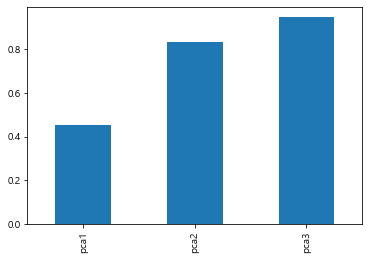

In [63]:
result['누적기여율'].plot.bar()

In [64]:
from sklearn.cluster import KMeans

In [65]:
def change_n_clusters(n_clusters, data):
    sum_of_squared_distance = []
    for n_cluster in n_clusters:
        kmeans = KMeans(n_clusters=n_cluster)
        kmeans.fit(data)
        sum_of_squared_distance.append(kmeans.inertia_)
        
    plt.figure(1 , figsize = (12, 6))
    plt.plot(n_clusters , sum_of_squared_distance , 'o')
    plt.plot(n_clusters , sum_of_squared_distance , '-' , alpha = 0.5)
    plt.grid()
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

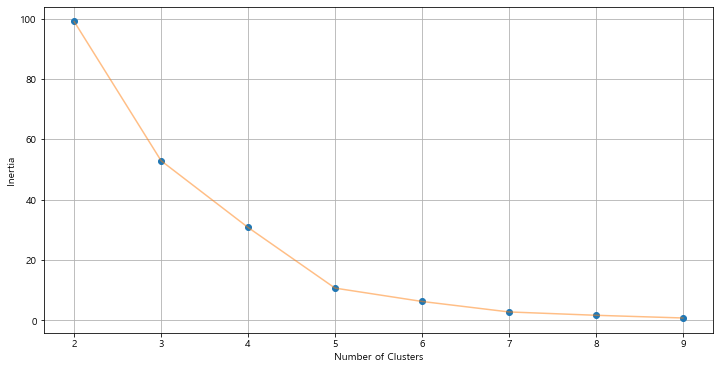

In [66]:
change_n_clusters(range(2,10), pca_df)

<IPython.core.display.Javascript object>

Text(0.5, 0.92, 'CLUSter_kmeans:5')

Text(0.5, 0, 'pca1')

Text(0.5, 0, 'pca2')

Text(0.5, 0, 'pca3')

Silhouette Score: 0.7941981227209766


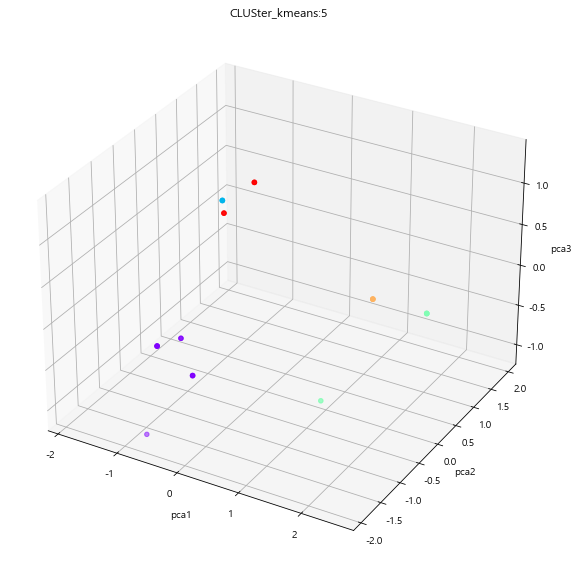

In [67]:
n=5
kmeans = KMeans(n_clusters=n)
labels = kmeans.fit_predict(pca_df.iloc[:,:3])

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d') 

x = pca_df.iloc[:,0]
y = pca_df.iloc[:,1]
z = pca_df.iloc[:,2]
ax.scatter(x, y, z, c = labels, s= 20, alpha=0.5, cmap='rainbow')
ax.set_title('CLUSter_kmeans:'+str(n))
ax.set_xlabel('pca1')
ax.set_ylabel('pca2')
ax.set_zlabel('pca3')

print("Silhouette Score:", silhouette_score(pca_df.iloc[:,:3], kmeans.labels_))

<IPython.core.display.Javascript object>

Text(0.5, 0.92, 'kmeans :5')

Text(0.5, 0, 'pca1')

Text(0.5, 0, 'pca2')

Text(0.5, 0, 'pca3')

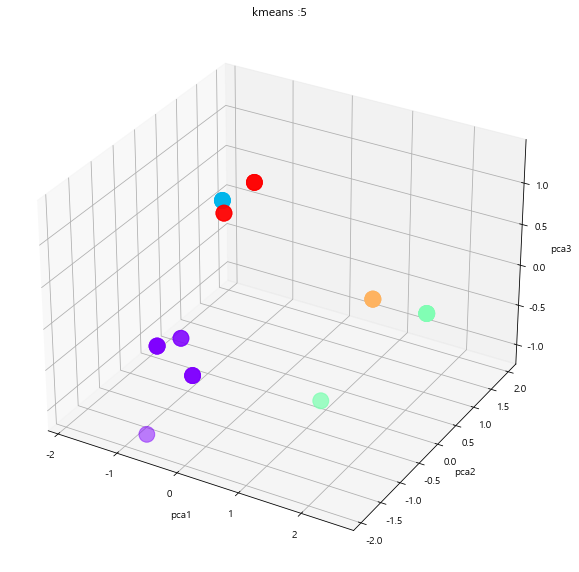

In [76]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d') 

x = pca_df.iloc[:,0]
y = pca_df.iloc[:,1]
z = pca_df.iloc[:,2]
ax.scatter(x, y, z, c = labels, s= 250, alpha=0.5, cmap='rainbow')
ax.set_title('kmeans :'+str(n))
ax.set_xlabel('pca1')
ax.set_ylabel('pca2')
ax.set_zlabel('pca3')

In [68]:
data["labels"]=labels
data

,Unnamed: 0,labels,행정동,시군구,응급실_60,주거면적_60미만,2019노인자살,2020노인학대건수,경로당,65세이상장애인수,수급권자수,65세이상인구수,독거노인,복지계열종사자수
0,0,4,중화2동,중랑구,5.948871,2.514954,4.539474,5.573077,3.926154,0.401372,0.394904,0.595316,0.643237,0.000000
1,1,4,신내1동,중랑구,5.948871,2.514954,4.539474,5.573077,3.926154,0.563237,0.617834,0.800918,0.483449,0.048780
2,2,4,면목본동,중랑구,5.948871,2.514954,4.539474,5.573077,3.926154,0.463374,0.456476,0.717614,0.705353,0.000000
3,3,4,망우본동,중랑구,5.948871,2.514954,4.539474,5.573077,3.926154,0.486968,0.456476,0.720150,0.688598,0.000000
4,4,2,종암동,성북구,5.694214,3.106311,6.900000,2.521154,2.301538,0.474897,0.354565,0.792346,0.650184,0.300813
5,5,2,석관동,성북구,5.694214,3.106311,6.900000,2.521154,2.301538,0.517695,0.352442,0.841845,0.690233,0.032520
6,6,0,번2동,강북구,4.652058,2.448019,3.268421,3.715385,4.840000,0.396708,0.666667,0.472413,0.466694,0.000000
7,7,0,번3동,강북구,4.652058,2.448019,3.268421,3.715385,4.840000,0.620576,1.000000,0.554871,0.542297,0.000000
8,8,0,삼양동,강북구,4.652058,2.448019,3.268421,3.715385,4.840000,0.377503,0.424628,0.579983,0.583163,0.000000
9,9,0,송중동,강북구,4.652058,2.448019,3.268421,3.715385,4.840000,0.415912,0.473461,0.707956,0.593380,0.000000


In [70]:
pd.pivot_table(data=data[['응급실_60', '주거면적_60미만', '2019노인자살',
       '2020노인학대건수',"labels"]],index = 'labels',aggfunc='mean')

,2019노인자살,2020노인학대건수,응급실_60,주거면적_60미만
labels,,,,
0,3.486316,3.326154,5.991765,2.687750
1,3.450000,6.900000,1.012749,4.104952
2,6.476316,3.656410,8.498714,6.056958
3,5.628947,5.307692,1.903168,6.761461
4,4.640351,5.720513,7.001613,2.840573


In [78]:
pd.pivot_table(data=data[['응급실_60', '주거면적_60미만', '2019노인자살',
       '2020노인학대건수',"labels"]],index = 'labels',aggfunc='mean').to_excel("piv_gu.xlsx")

In [71]:
data.to_excel("seo_gu.xlsx")

In [79]:
data['labels'].value_counts()

0    15
4     9
2     9
1     6
3     6
Name: labels, dtype: int64

In [100]:
print(list(data["행정동"][data['labels']==0]))

['번2동', '번3동', '삼양동', '송중동', '송천동', '인수동', '방학1동', '도봉1동', '도봉2동', '은천동', '성현동', '난곡동', '삼성동', '미성동', '수서동']


In [91]:
data["시군구"][data['labels']==4].value_counts().index
data["시군구"][data['labels']==4].value_counts()

Index(['강동구', '중랑구'], dtype='object')

강동구    5
중랑구    4
Name: 시군구, dtype: int64

In [80]:
data.head(2)

,Unnamed: 0,labels,행정동,시군구,응급실_60,주거면적_60미만,2019노인자살,2020노인학대건수,경로당,65세이상장애인수,수급권자수,65세이상인구수,독거노인,복지계열종사자수
0,0,4,중화2동,중랑구,5.948871,2.514954,4.539474,5.573077,3.926154,0.401372,0.394904,0.595316,0.643237,0.00000
1,1,4,신내1동,중랑구,5.948871,2.514954,4.539474,5.573077,3.926154,0.563237,0.617834,0.800918,0.483449,0.04878
